## Data Analysis on Student Mental Health

### Step 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

### Step 2. Load the data

In [41]:
data = pd.read_csv("shm_data.csv")

### Step 3. Understand the data

In [42]:
data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [43]:
data.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [44]:
data.dtypes

Timestamp                                        object
Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object

In [45]:
len(data)

101

In [46]:
data.shape

(101, 11)

### Step 4. Data Cleaning

#### Rename Columns

In [47]:
data.rename(columns = {'Choose your gender':'Gender',
            'What is your course?':'Course',
            'Your current year of Study':'Year_of_study',
            'What is your CGPA?':'CGPA',
            'Marital Status':'Marital_status',
            'Do you have Depression?':'Depression',
            'Do you have Anxiety?':'Anxiety',
            'Do you have Panic attack?':"Panic_attacks",
            'Did you seek any specialist for a treatment?':'Seek_treatment'}, inplace = True)

In [48]:
data.columns

Index(['Timestamp', 'Gender', 'Age', 'Course', 'Year_of_study', 'CGPA',
       'Marital status', 'Depression', 'Anxiety', 'Panic_attacks',
       'Seek_treatment'],
      dtype='object')

#### Check for missing values

In [49]:
data.isnull().sum()

Timestamp         0
Gender            0
Age               1
Course            0
Year_of_study     0
CGPA              0
Marital status    0
Depression        0
Anxiety           0
Panic_attacks     0
Seek_treatment    0
dtype: int64

### Replacing the missing value with mean

In [50]:
data['Age'].mean()

20.53

In [51]:
data=data.fillna({'Age':21})

In [52]:
data.isnull().sum()

Timestamp         0
Gender            0
Age               0
Course            0
Year_of_study     0
CGPA              0
Marital status    0
Depression        0
Anxiety           0
Panic_attacks     0
Seek_treatment    0
dtype: int64

### Standardizing the data

#### Extarcting the present year of study 

In [53]:
data['Year_of_study'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [54]:
data['Year_of_study'] = data['Year_of_study'].str.strip().str[-1]

In [55]:
print(data['Year_of_study'])

0      1
1      2
2      1
3      3
4      4
      ..
96     1
97     2
98     3
99     4
100    2
Name: Year_of_study, Length: 101, dtype: object


#### Standardizing the CGPA range

In [56]:
data['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [57]:
data['CGPA'] = data['CGPA'].replace('3.50 - 4.00 ', '3.50 - 4.00')

In [58]:
data['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

### Step 4. Univariate Analysis

#### No. of male and female students

In [59]:
cmap = plt.colormaps["tab20c"]
colors = cmap([1, 2, 5, 6, 9, 10])

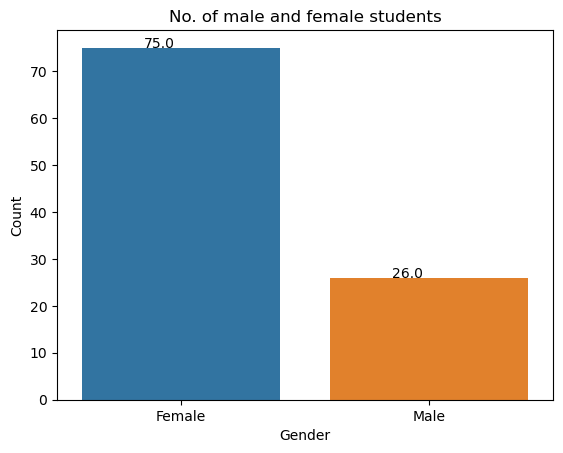

In [60]:
ax = sns.countplot(data['Gender'])

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.title('No. of male and female students')
plt.ylabel('Count')
plt.show()

#### Age group of the students

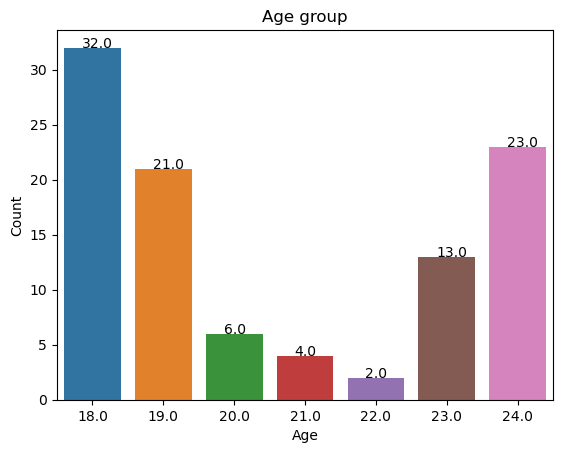

In [61]:
ax = sns.countplot(data['Age'])

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.title('Age group')
plt.ylabel('Count')
plt.show()

#### Average age of the students

In [62]:
print('Mean age of the students under survey is : ',data['Age'].mean())

Mean age of the students under survey is :  20.534653465346533


#### Most common year of study

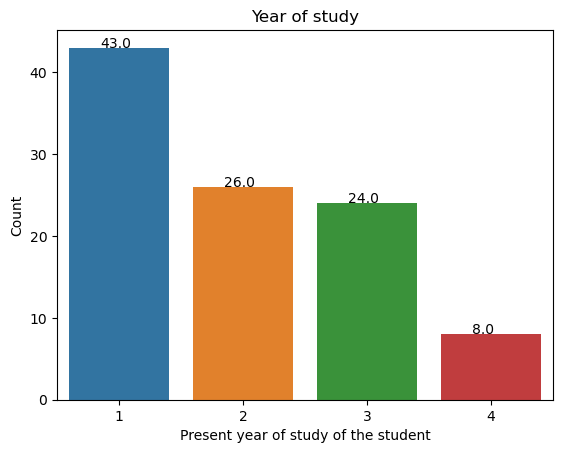

In [63]:
ax = sns.countplot(data['Year_of_study'])

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.title('Year of study')
plt.ylabel('Count')
plt.xlabel('Present year of study of the student')
plt.show()

#### Most common CGPA range among the students

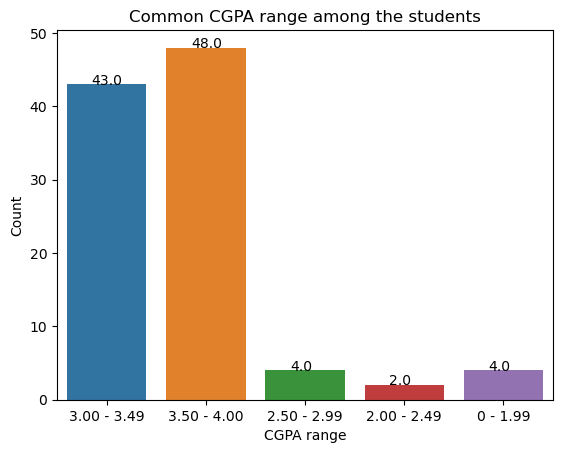

In [64]:
ax = sns.countplot(data['CGPA'])

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.title('Common CGPA range among the students')
plt.ylabel('Count')
plt.xlabel('CGPA range')
plt.show()

#### Number of married students surveyed

In [65]:
data['Marital status'].value_counts()

No     85
Yes    16
Name: Marital status, dtype: int64

#### Analysing the mental health components of a student

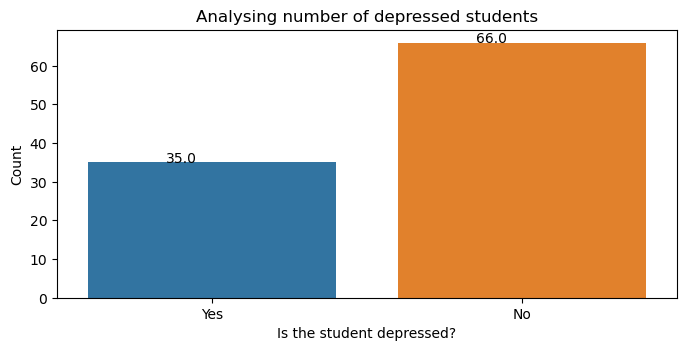

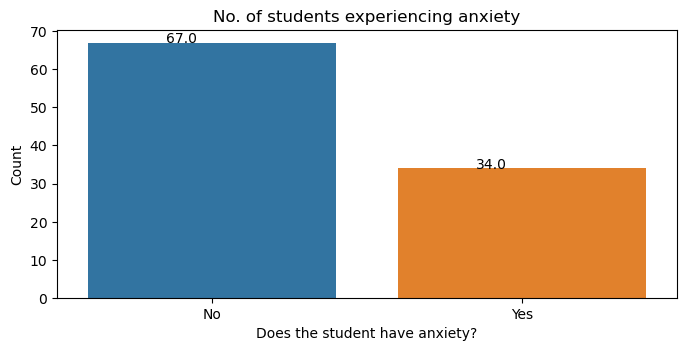

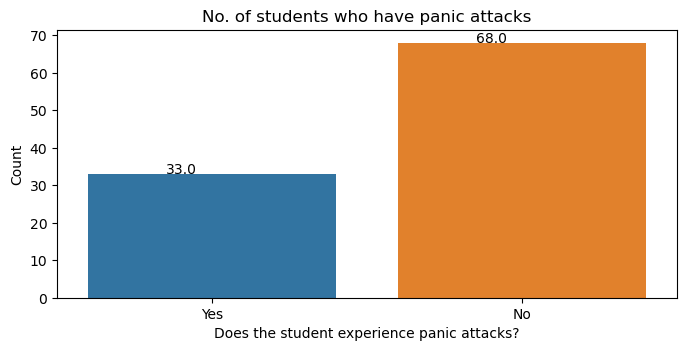

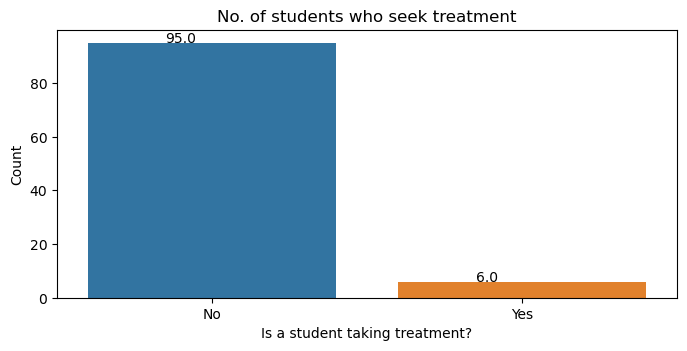

In [66]:
### depression
plt.figure(figsize=(8,16))
plt.subplot(4,1,1)
ax = sns.countplot(data['Depression'])

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.title('Analysing number of depressed students')
plt.ylabel('Count')
plt.xlabel('Is the student depressed?')
plt.show()

### anxiety
plt.figure(figsize=(8,16))
plt.subplot(4,1,2)
ax = sns.countplot(data['Anxiety'])

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.title('No. of students experiencing anxiety')
plt.ylabel('Count')
plt.xlabel('Does the student have anxiety?')
plt.show()

### pani attacks
plt.figure(figsize=(8,16))
plt.subplot(4,1,3)
ax = sns.countplot(data['Panic_attacks'])

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.title('No. of students who have panic attacks')
plt.ylabel('Count')
plt.xlabel('Does the student experience panic attacks?')
plt.show()

### seek treatment
plt.figure(figsize=(8,16))
plt.subplot(4,1,4)
ax = sns.countplot(data['Seek_treatment'])

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.title('No. of students who seek treatment')
plt.ylabel('Count')
plt.xlabel('Is a student taking treatment?')
plt.show()

### Step 6. Bivariate Analysis

#### Analyzing the average age of male and female students

In [67]:
age_gender = data.groupby('Gender')['Age'].mean()

In [68]:
print(age_gender)

Gender
Female    20.533333
Male      20.538462
Name: Age, dtype: float64


#### Does the students gender affect their CGPA?

In [69]:
cgpa_gender = data.groupby(['CGPA','Gender'])['CGPA'].count()

In [70]:
print(cgpa_gender)

CGPA         Gender
0 - 1.99     Female     2
             Male       2
2.00 - 2.49  Female     1
             Male       1
2.50 - 2.99  Female     4
3.00 - 3.49  Female    29
             Male      14
3.50 - 4.00  Female    39
             Male       9
Name: CGPA, dtype: int64


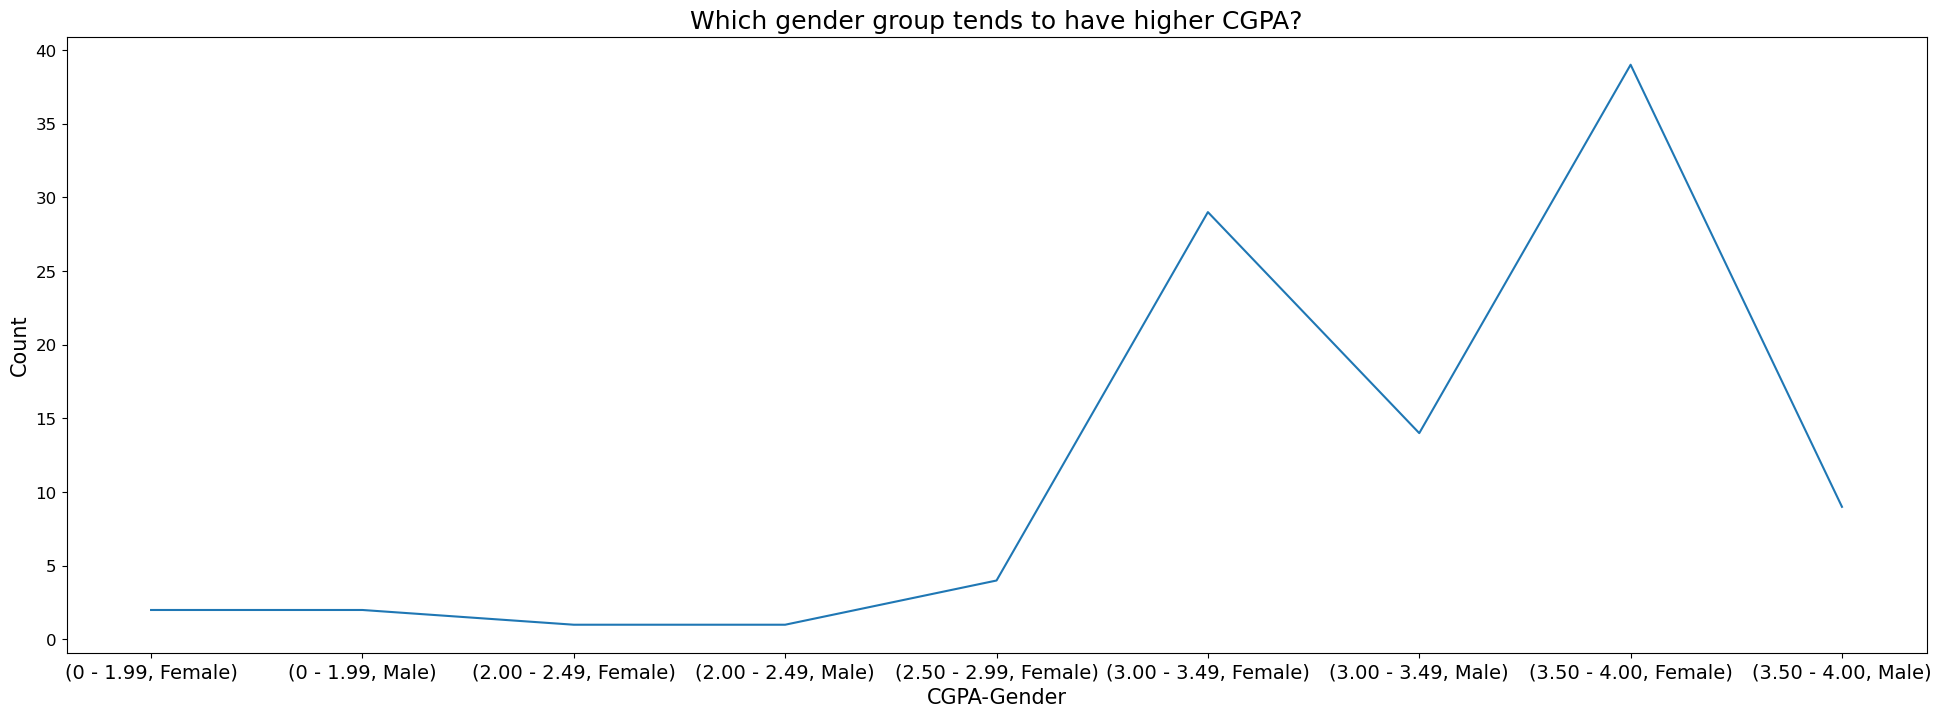

In [71]:
plt.figure(figsize=(24,8))
cgpa_gender.plot()

plt.title('Which gender group tends to have higher CGPA?', size=18)
plt.xlabel('CGPA-Gender',size=15)
plt.ylabel('Count',size=15)
plt.xticks(size=14)
plt.yticks(size=12)
plt.show()

#### Analyzing the correlation between gender and mental health

<AxesSubplot:title={'center':'Gender vs seeking treatment'}, ylabel='None'>

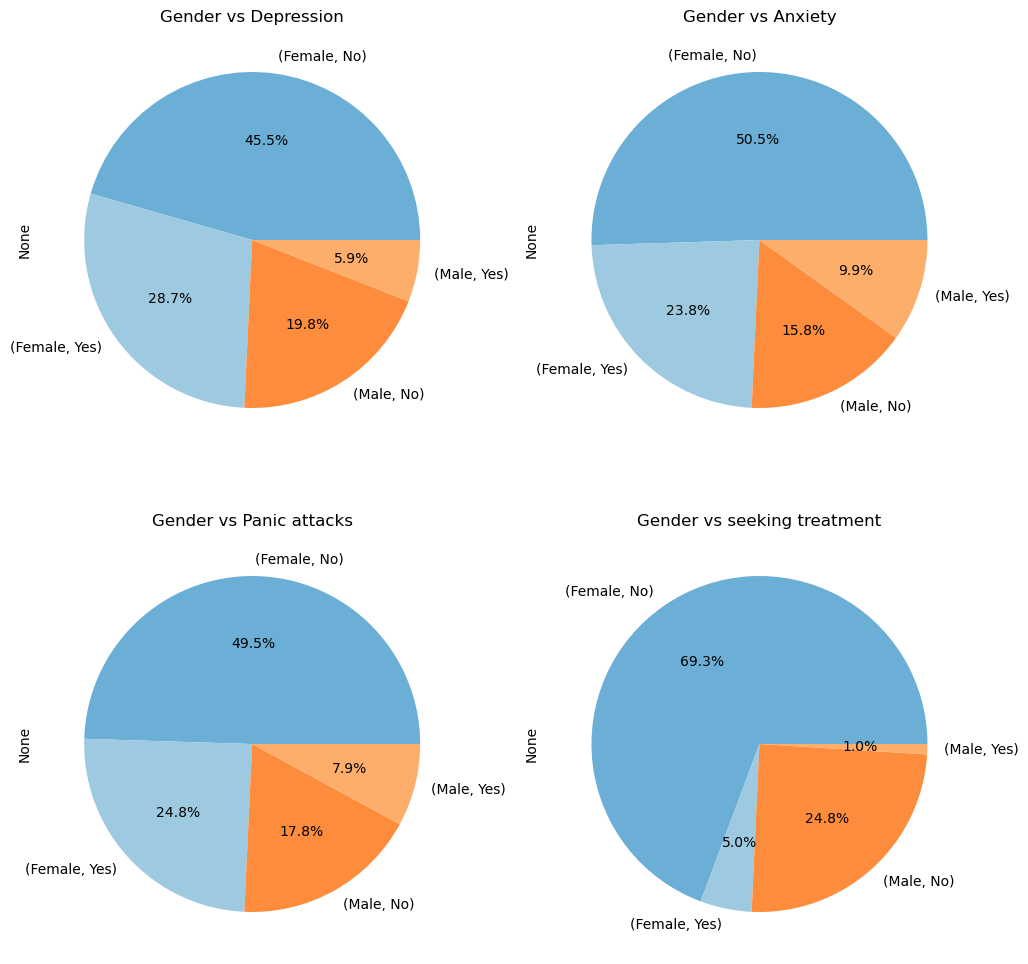

<Figure size 800x800 with 0 Axes>

In [72]:
cmap = plt.colormaps["tab20c"]
colors = cmap([1, 2, 5, 6, 9, 10])

fig, axs =plt.subplots(2,2,figsize=(12,12))
plt.figure(figsize=(8,8))

data.groupby(['Gender','Depression']).size().plot(kind='pie', autopct='%1.1f%%',ax=axs[0,0], title='Gender vs Depression', colors=colors)

data.groupby(['Gender','Anxiety']).size().plot(kind='pie', autopct='%1.1f%%',ax=axs[0,1], title='Gender vs Anxiety',colors=colors)

data.groupby(['Gender','Panic_attacks']).size().plot(kind='pie', autopct='%1.1f%%',ax=axs[1,0],title='Gender vs Panic attacks',colors=colors)

data.groupby(['Gender','Seek_treatment']).size().plot(kind='pie', autopct='%1.1f%%',ax=axs[1,1], title='Gender vs seeking treatment',colors=colors)

#### Seeing if age effects depression, anxiety and panic attacks and the students ability to seek medical treatment

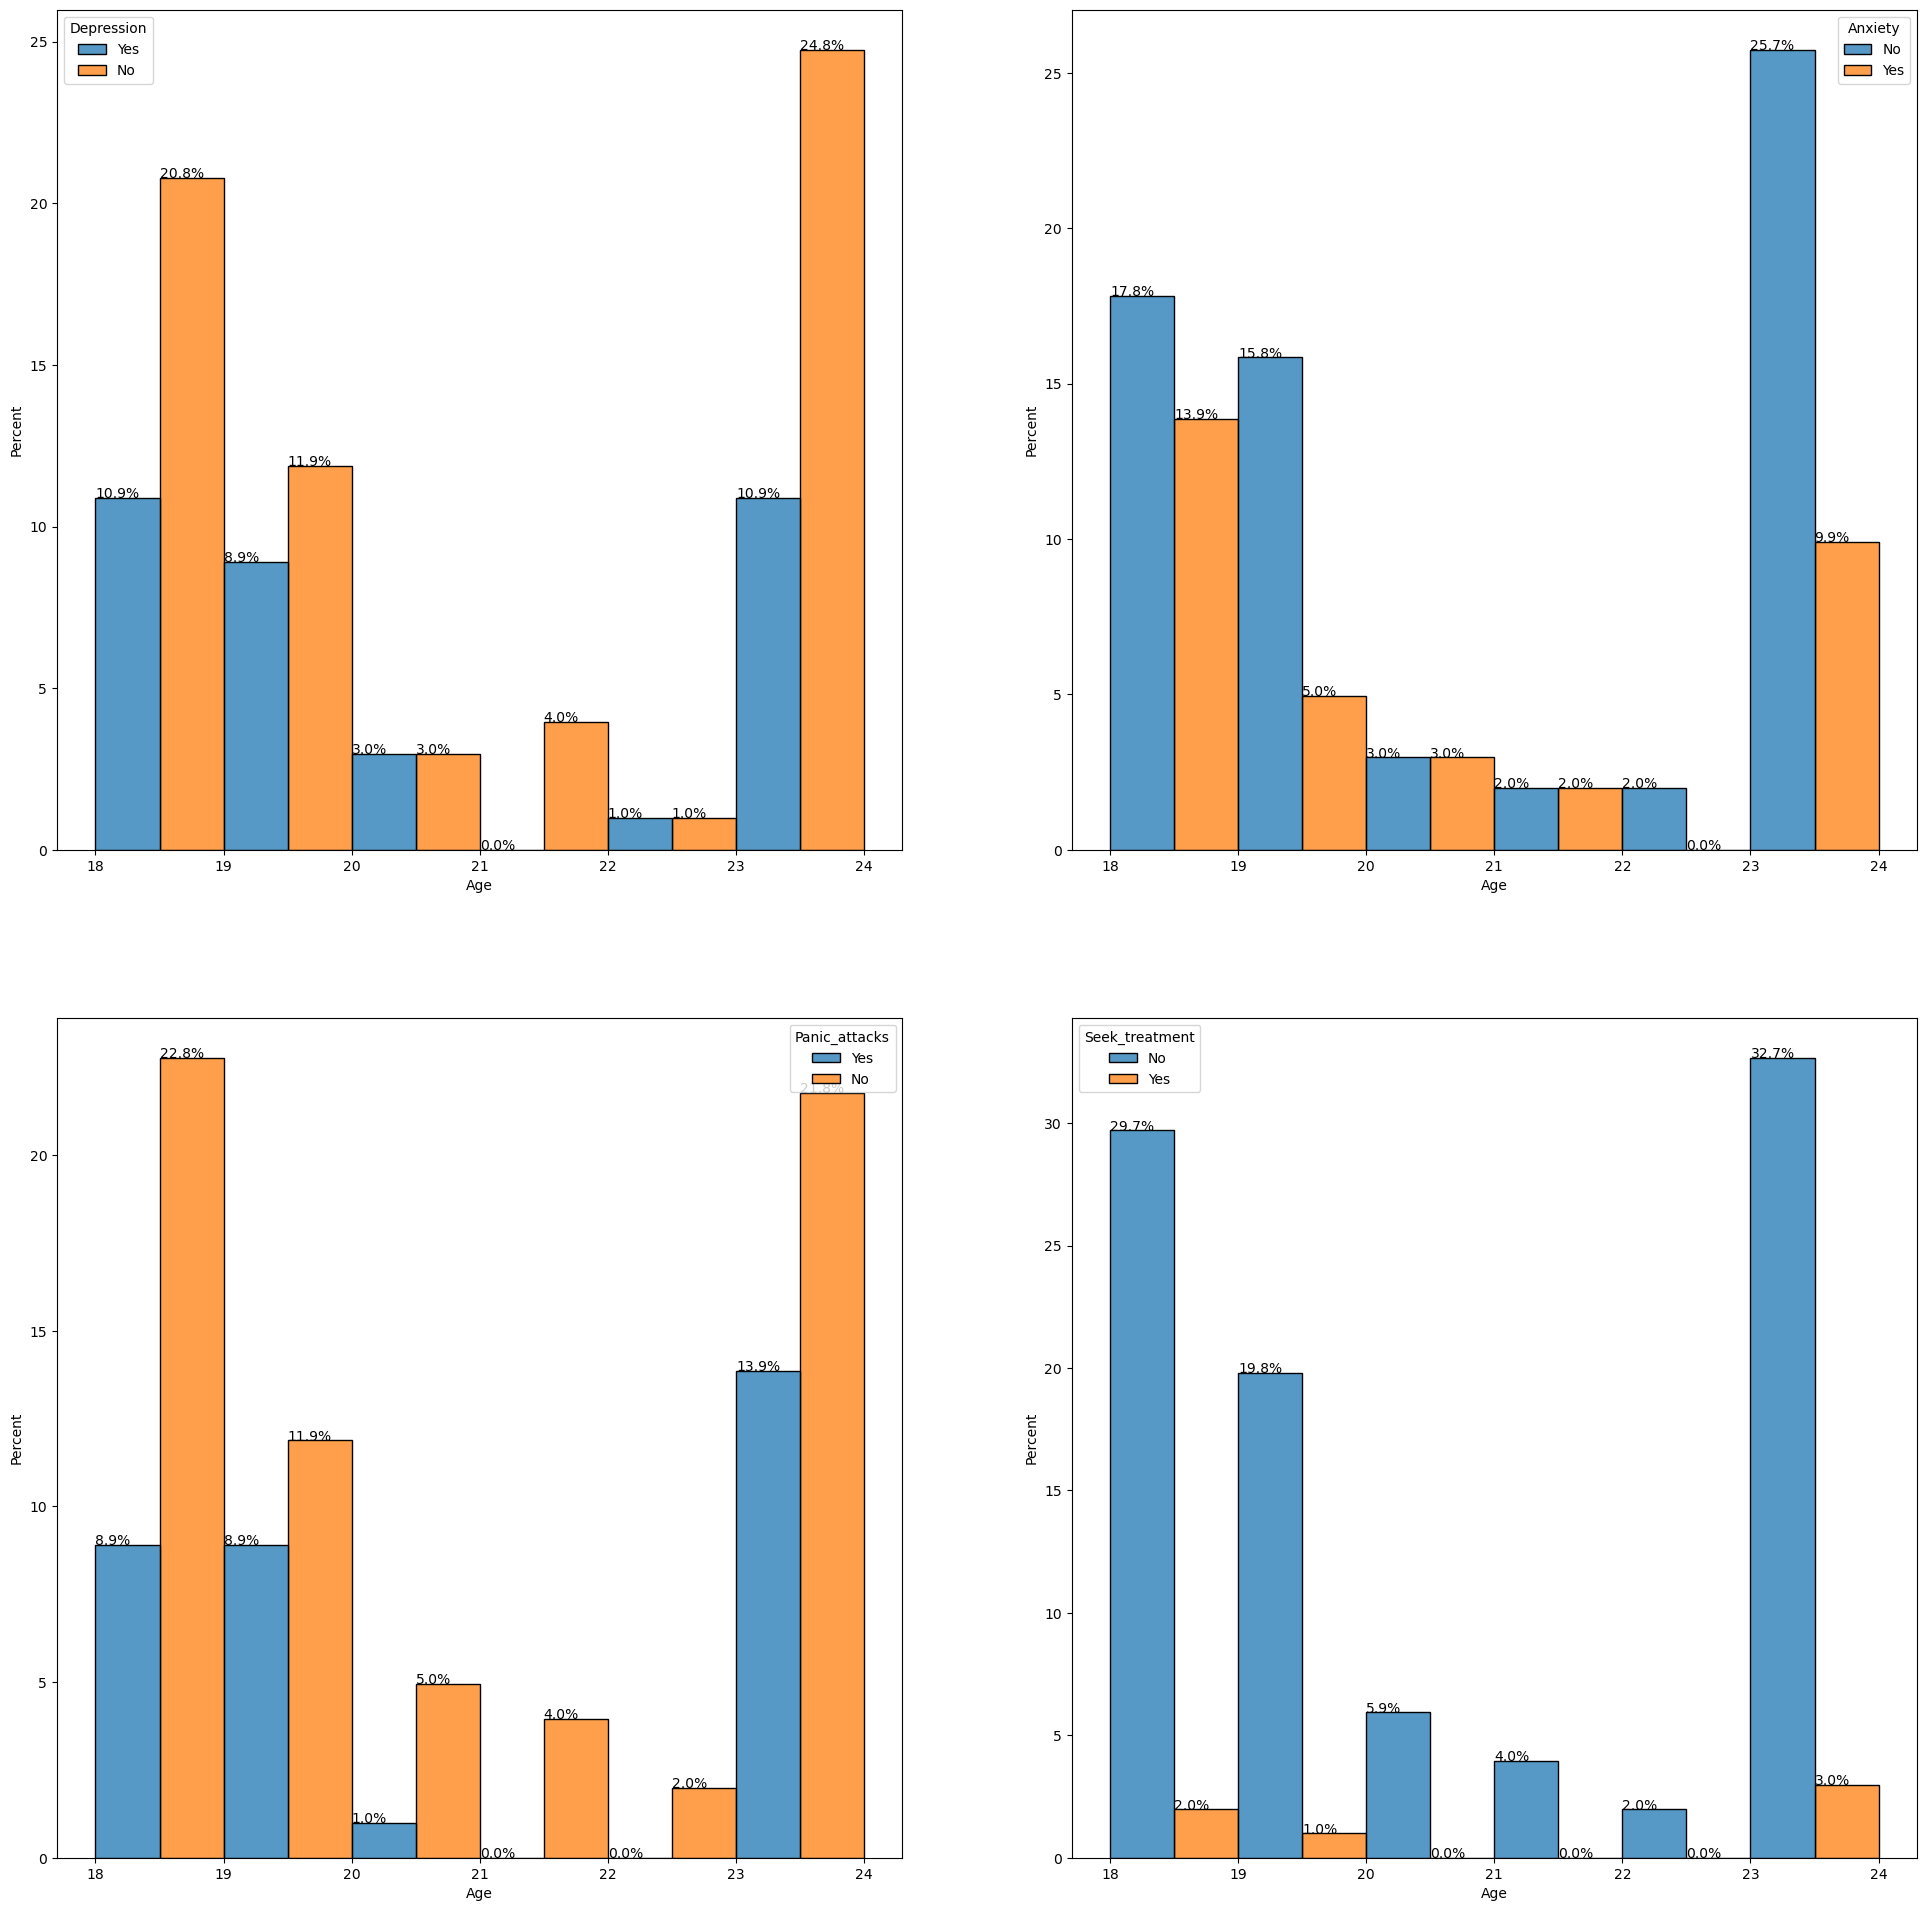

<Figure size 800x600 with 0 Axes>

In [73]:
fig, axs =plt.subplots(2,2,figsize=(24,24))
plt.figure(figsize=(8,6))
ax1=sns.histplot(binwidth=1,
            x='Age',
            hue='Depression',
            data=data,
            stat="percent",
            multiple="dodge",ax=axs[0,0])

for p in ax1.patches:
    ax1.annotate('{:.1f}%'.format(p.get_height()), (p.get_x(), p.get_height()))
    
ax2=sns.histplot(binwidth=1,
            x='Age',
            hue='Anxiety',
            data=data,
            stat="percent",
            multiple="dodge",ax=axs[0,1])

for p in ax2.patches:
    ax2.annotate('{:.1f}%'.format(p.get_height()), (p.get_x(), p.get_height()))
    
ax3=sns.histplot(binwidth=1,
            x='Age',
            hue='Panic_attacks',
            data=data,
            stat="percent",
            multiple="dodge",ax=axs[1,0])

for p in ax3.patches:
    ax3.annotate('{:.1f}%'.format(p.get_height()), (p.get_x(), p.get_height()))
    
ax4=sns.histplot(binwidth=1,
            x='Age',
            hue='Seek_treatment',
            data=data,
            stat="percent",
            multiple="dodge",ax=axs[1,1])

for p in ax4.patches:
    ax4.annotate('{:.1f}%'.format(p.get_height()), (p.get_x(), p.get_height()))


#### Analyzing the effect of academic CGPA on the mental health of students

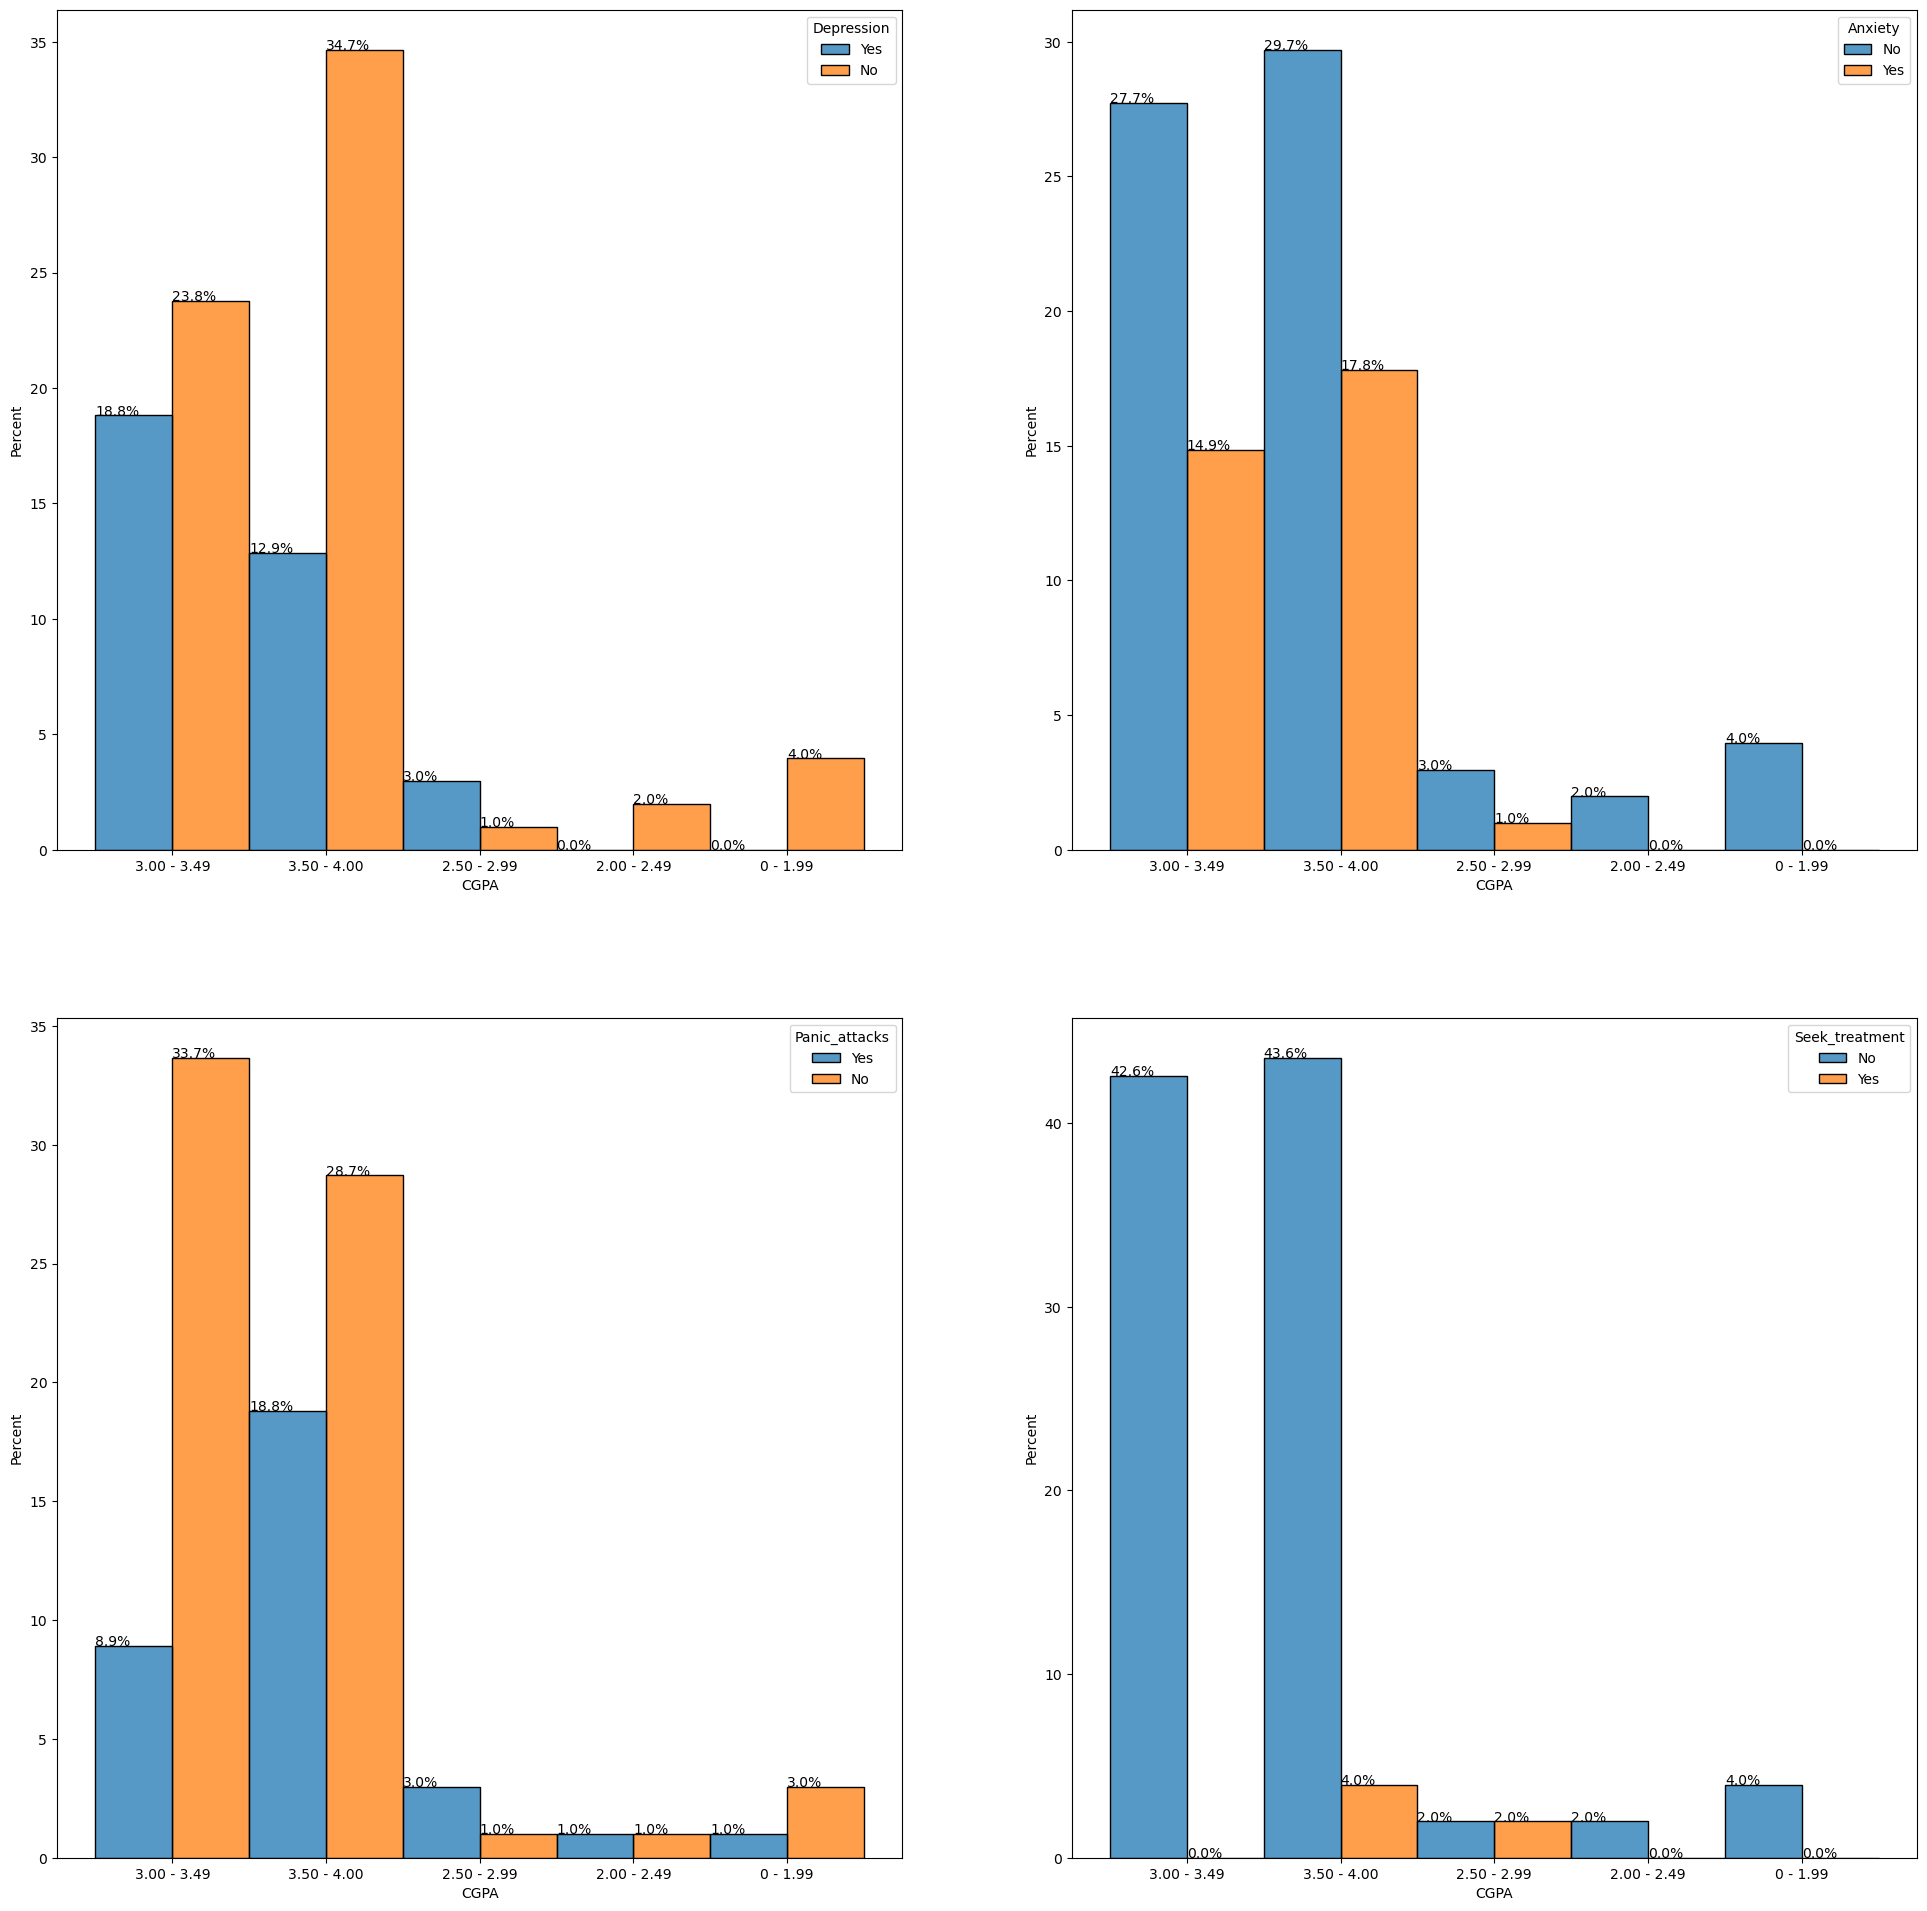

<Figure size 800x800 with 0 Axes>

In [74]:
fig, axs =plt.subplots(2,2,figsize=(24,24))
plt.figure(figsize=(8,8))

#cgpa vs depression
ax1=sns.histplot(binwidth=1,
            hue='Depression',
x='CGPA',
            data=data,
            stat="percent",
            multiple="dodge",ax=axs[0,0])

for p in ax1.patches:
    ax1.annotate('{:.1f}%'.format(p.get_height()), (p.get_x(), p.get_height()))


# cgpa vs anxiety
ax2=sns.histplot(binwidth=1,
            x='CGPA',
            hue='Anxiety',
            data=data,
            stat="percent",
            multiple="dodge",ax=axs[0,1])

for p in ax2.patches:
    ax2.annotate('{:.1f}%'.format(p.get_height()), (p.get_x(), p.get_height()))

#cgpa vs panic attacks
ax3=sns.histplot(binwidth=1,
            hue='Panic_attacks',
            x='CGPA',
            data=data,
            stat="percent",
            multiple="dodge",ax=axs[1,0])

#cgpa vs seeking treatment
for p in ax3.patches:
    ax3.annotate('{:.1f}%'.format(p.get_height()), (p.get_x(), p.get_height()))

ax4=sns.histplot(binwidth=1,
            hue='Seek_treatment',
            x='CGPA',
            data=data,
            stat="percent",
            multiple="dodge",ax=axs[1,1])

for p in ax4.patches:
    ax4.annotate('{:.1f}%'.format(p.get_height()), (p.get_x(), p.get_height()))
plt.show()

#### How early during their studies are students facing depression?

In [75]:
data['Year_of_study']=data['Year_of_study'].astype('int')

<AxesSubplot:xlabel='Depression', ylabel='Year_of_study'>

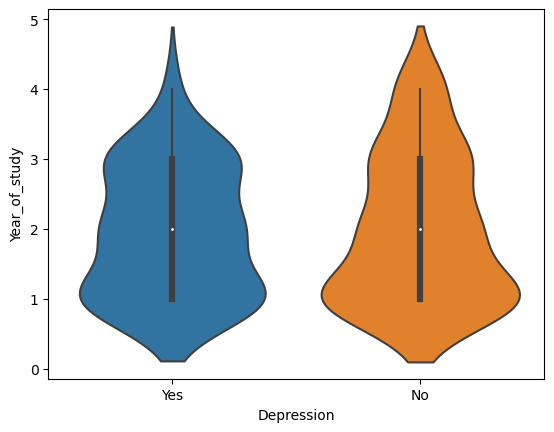

In [76]:
sns.violinplot(data['Depression'],data['Year_of_study'])

#### Analyzing the correlation among the mental health issues

#### Does depression cause anxiety and panic attacks?

In [77]:
df = data.groupby(['Depression','Anxiety']).size()
print(df)

Depression  Anxiety
No          No         50
            Yes        16
Yes         No         17
            Yes        18
dtype: int64


In [78]:
cols=['Depression','Anxiety','Panic_attacks','Seek_treatment']
#data[cols]=data[cols].replace({'Yes':1,'No':0})
df=data[cols].value_counts()
print(df)

Depression  Anxiety  Panic_attacks  Seek_treatment
No          No       No             No                37
                     Yes            No                13
            Yes      No             No                13
Yes         No       No             No                10
            Yes      Yes            No                 9
                     No             No                 6
            No       Yes            No                 4
No          Yes      Yes            No                 3
Yes         No       Yes            Yes                3
            Yes      No             Yes                2
                     Yes            Yes                1
dtype: int64
